In [1]:
import os
if not "ROUTING_MAP" in os.environ:
    print("Restart jupyter with environment variable set")

In [7]:
from run_benchmarks import run, keep_samples_with_lowest_variance_in_group
%matplotlib inline
import pandas as pd

In [4]:
master = run('master', 'router-benchmark')

Compiling benchmark for master
Running benchmark for master


In [5]:
compare = run('use-inserter-graph-database', 'router-benchmark')

Compiling benchmark for use-inserter-graph-database
Running benchmark for use-inserter-graph-database


In [19]:
compare_distinct = run('tmp-distinct', 'router-benchmark')

Compiling benchmark for tmp-distinct
Running benchmark for tmp-distinct


In [20]:
results = pd.concat([master, compare, compare_distinct])
results['pops'] = results['popCount'].apply(lambda s: int(s))
results = results[results['pops']>250]

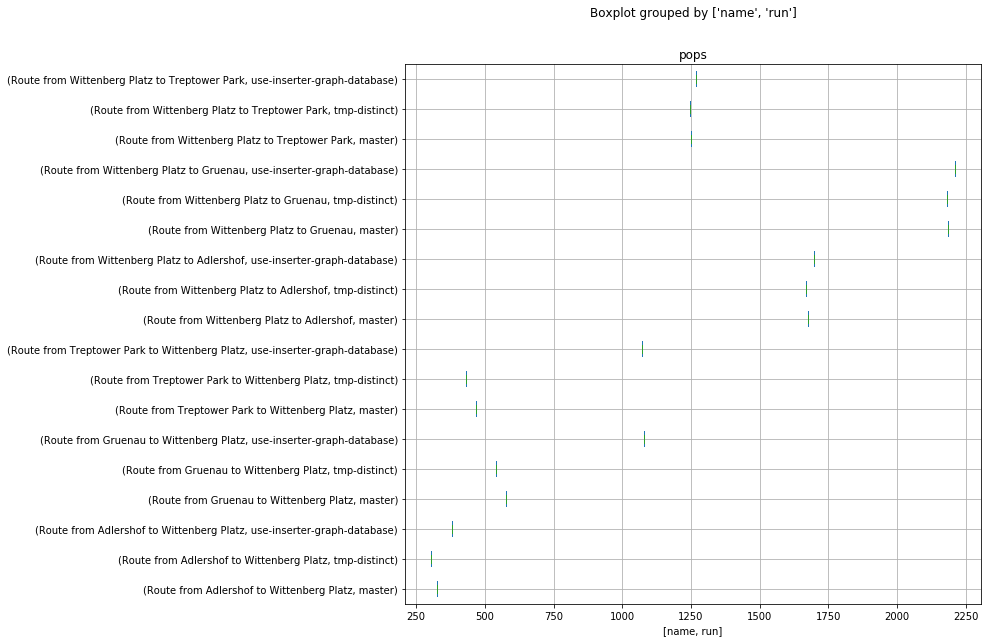

In [21]:
results.boxplot(by=['name', 'run'], column='pops', figsize=(10, 10), bootstrap=10000, notch=True, vert=False)